In [2]:
import numpy as np 
import pandas as pd
from tensorflow import keras
#import matplotlib.pyplot as plt 
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, Conv2DTranspose
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
import os
import shutil
from tensorflow.keras import metrics
import matplotlib
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, RMSprop


# Start with just one image
1. upload image
2. create duplicate image with lines
3. build model and try to run with one image

In [ ]:
# #read in one image as target (or y)
# y = np.array(Image.open('Data/Unruled/sc0181_NEW.jpg'))
# #show image from array
# Image.fromarray(y)

In [ ]:
#y.shape

In [ ]:
#2. create lines on target image

# X = np.array(y)
# #[row_start:row_stop: row_step, col_start:col_stop:col_step ] 
# X[::40+np.random.randint(-2,2),:] = 80+np.random.randint(-60, 130)
# #show new image from array
# Image.fromarray(X)


In [3]:
image_to_predict = np.array(Image.open('Data/Original_Ruled/IMG_0002.jpg'))

In [4]:
# fig, axs = matplotlib.pyplot.subplots(1,2, figsize = (10,10))
# [ax.imshow(x) for ax, x in zip(axs.flatten(), [X, y])];


In [5]:
#reshape to fit into model
# X = X.reshape(*X.shape,1)
# X.shape

# Bring in entire data set

In [7]:
#y
y_list = []
for image in os.listdir('Data/y_variables/Unruled'):
    file='Data/y_variables/Unruled/'+ str(image)
    y_image = np.array(Image.open(file))
    y_image = y_image.reshape(*y_image.shape,1)
    y_list.append(y_image)
                  
y = np.array(y_list)  
y.shape

(669, 500, 400, 1)

In [8]:
#X

X_list = []
for image in os.listdir('Data/X_variables/computer_generated_lines'):
    
    file = 'Data/X_variables/computer_generated_lines/'+str(image)
    X_image = np.array(Image.open(file))
    X_image = X_image.reshape(*X_image.shape,1)
    X_list.append(X_image)
    
X = np.array(X_list)
X.shape

(669, 500, 400, 1)

In [ ]:
# train_datagen = ImageDataGenerator()
# #validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# X_train_generator = train_datagen.flow_from_directory(
#         '/Users/megan/Galvanize/capstone_folder/Capstone_3/Data/X_variables',
#         target_size=(500, 400),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='input')
# y_train_generator = train_datagen.flow_from_directory(
#         '/Users/megan/Galvanize/capstone_folder/Capstone_3/Data/y_variables',
#         target_size=(500, 400),
#         color_mode='grayscale',
#         batch_size=32,
#         class_mode='input')


In [ ]:
#next(X_train_generator)[1]

In [14]:
# image_generator = train_datagen.flow(
#     x=X_list,
#     y=y_list,
#     batch_size=32,
#     shuffle=False)
# X_list[0].shape
#input_shape = (500,400,1)
tf.__version__

'1.10.0'

In [15]:
#3.build the model

model = Sequential()
#model.add(Input(input_shape))
#model.add(Input((X.shape)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))

model.add(Dense(128,  activation='relu'))
# model.add(Dense(64,  activation='relu'))
# #model.add(Dense(2,    activation='linear', name="bottleneck"))
# model.add(Dense(64,  activation='relu'))
model.add(Dense(128,  activation='relu'))
# model.add(Dense(784,  activation='linear'))

model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 32, kernel_size=(3,3), activation='relu'))
model.add(Conv2DTranspose(filters = 1, kernel_size=(3,3), activation='linear', padding='same'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 498, 398, 32)      320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 496, 396, 32)      9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 494, 394, 32)      9248      
_________________________________________________________________
dense (Dense)                (None, 494, 394, 128)     4224      
_________________________________________________________________
dense_1 (Dense)              (None, 494, 394, 128)     16512     
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 496, 396, 32)      36896     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 498, 398, 32)      9248      
__________

In [16]:
type(Input)

function

In [20]:
#4 compile your model

# METRICS = [ metrics.CategoricalAccuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC',curve='pr', multi_label=False),
#            metrics.SensitivityAtSpecificity(0.5, name='Sens@Spec'),
#            metrics.SpecificityAtSensitivity(0.5, name='Spec@Sens')]
# new tensorflow
# METRICS = [ metrics.Accuracy(name='ACCURACY'),
#             metrics.AUC(name='AUC')]


model.compile(loss = 'mse', optimizer = 'adam', metrics=['accuracy'])


In [32]:
#5 set up tensorboard

#updated tensorboard
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     histogram_freq=2,
#     write_graph=True,
#     write_images=True,
#     update_freq="epoch",
#     profile_batch=2,
#     embeddings_freq=0,
#     embeddings_metadata=None)


#old version
# checkpoint_filepath = './tmp/checkpoint'
# tensorboard = TensorBoard(log_dir="./logs",
#     write_graph=True,
#     write_images=True)

# updated tensorboard
# early_stopping = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)
# model_cp = ModelCheckpoint(filepath=checkpoint_filepath, save_best_only=True)


#old version
#model_cp = ModelCheckpoint(filepath=checkpoint_filepath)
early_stopping = EarlyStopping(monitor='loss',patience=10)

In [33]:
# for X in X_list:
#     for y in y_list:

#         model.fit(x=np.array([X]), y=np.array([y]), epochs = 500, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])

# model.fit(x=X, y=y, epochs = 100, verbose=1, callbacks=[tensorboard, early_stopping,  model_cp])
model.fit(x=X, y=y, epochs = 100, verbose=1, callbacks=[early_stopping])

Epoch 1/100
669/669 [==============================] - 1072s 2s/step - loss: 1065.0351 - acc: 0.0160
Epoch 2/100
669/669 [==============================] - 1074s 2s/step - loss: 900.3969 - acc: 0.0229
Epoch 3/100
669/669 [==============================] - 1072s 2s/step - loss: 830.1613 - acc: 0.0235
Epoch 4/100
669/669 [==============================] - 1072s 2s/step - loss: 823.4719 - acc: 0.0241
Epoch 5/100
669/669 [==============================] - 1074s 2s/step - loss: 933.9014 - acc: 0.0165
Epoch 6/100
669/669 [==============================] - 1073s 2s/step - loss: 961.7143 - acc: 0.0141
Epoch 7/100
669/669 [==============================] - 1076s 2s/step - loss: 843.8458 - acc: 0.0212
Epoch 8/100
669/669 [==============================] - 1080s 2s/step - loss: 839.3140 - acc: 0.0195
Epoch 9/100
669/669 [==============================] - 1081s 2s/step - loss: 806.2303 - acc: 0.0229
Epoch 10/100
669/669 [==============================] - 1080s 2s/step - loss: 789.5377 - acc: 0.024

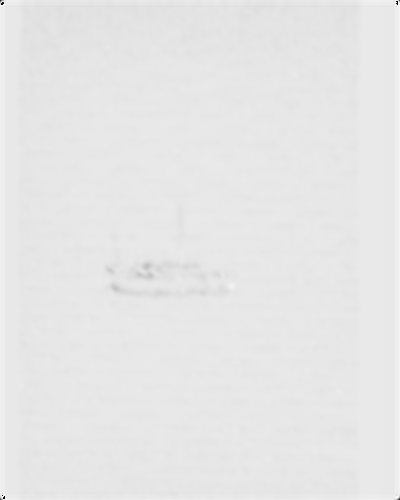

In [34]:
# result = model.predict(np.array([X]))
result = model.predict(np.array([image_to_predict.reshape(*image_to_predict.shape, 1)]))
result = result.astype(np.uint8).reshape(500,400)
Image.fromarray(result)

In [ ]:
input_img = Input(shape=input_shape)
x = Conv2D(256, 2, activation="swish", padding="same")(input_img)
x = BatchNormalization()(x)
x = Conv2D(128, 1, activation="swish", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, padding="same")(x) 
x = Conv2D(64, 1, activation="linear", padding="same")(x)
x = BatchNormalization()(x)
encoded = MaxPooling2D(2, padding="same")(x) 
x = Conv2D(64, 1, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
# x = UpSampling2D(2)(x)
# x = Dropout(0.5)(x)
x = Conv2D(128, 1, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = UpSampling2D(2)(x)
x = Conv2D(256, 2, activation="relu", padding="same")(x)
x = BatchNormalization()(x)
decoded = Conv2D(1, 1, activation="linear", padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.summary()

In [ ]:
#next(X_train_generator).shape

In [ ]:
#type(X_train_generator)

In [ ]:
#!tensorboard --logdir=logs


In [ ]:
#to create all images with random line widths and depth - only need to do once

# for image in os.listdir('Data/Unruled'):

#     y=np.array((Image.open(f'Data/Unruled/{image}')))
#     X = np.array(y)
#     X[::40+np.random.randint(-20,20),:] = 80+np.random.randint(-60, 130)
#     pil_X = Image.fromarray(X)
#     pil_X.save(f'Data/computer_generated_lines/lined_{image}')
